In [37]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.graphics.regressionplots import influence_plot 
import statsmodels.formula.api as smf
import numpy as np 

In [38]:
# reading the data 
startUps = pd.read_csv("C:/Users/Dell/Desktop/ExcelR Assignments/Yash/MLR/50_Startups.csv")

In [39]:
startUps.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [40]:
startUps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [41]:
startUps.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [42]:
startUp1 = startUps.rename({'R&D Spend':'RnD', 'Administration':'Admin', 'Marketing Spend': 'Marketing'}, axis=1)

In [43]:
startUp1

,RnD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [44]:
#checking for duplicate entries
startUp1[startUp1.duplicated()]

,RnD,Admin,Marketing,State,Profit


In [45]:
startUp1.describe()

,RnD,Admin,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [46]:
startUp1.corr()

,RnD,Admin,Marketing,Profit
RnD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [47]:
sns.set_style(style='darkgrid')
sns.pairplot(startUp1)

In [48]:
model = smf.ols("Profit~ RnD+Admin+Marketing", data = startUp1).fit()

In [49]:
#coefficients parameters 
model.params

Intercept    50122.192990
RnD              0.805715
Admin           -0.026816
Marketing        0.027228
dtype: float64

In [50]:
#t-value & p-value
model.tvalues , np.round(model.pvalues, 5)

(Intercept     7.626218
 RnD          17.846374
 Admin        -0.525507
 Marketing     1.655077
 dtype: float64,
 Intercept    0.00000
 RnD          0.00000
 Admin        0.60176
 Marketing    0.10472
 dtype: float64)

In [51]:
#Finding r-squared values 
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [52]:
#Building SLR model for Admin and Marketing 
slr_admin = smf.ols("Profit~Admin", data=startUp1).fit()
slr_admin.tvalues, slr_admin.pvalues # Admin has insignificant p-value

(Intercept    3.040044
 Admin        1.419493
 dtype: float64,
 Intercept    0.003824
 Admin        0.162217
 dtype: float64)

In [53]:
slr_mkt = smf.ols("Profit~Marketing", data=startUp1).fit()
slr_mkt.tvalues , slr_mkt.pvalues # Marketing has significant value 

(Intercept    7.808356
 Marketing    7.802657
 dtype: float64,
 Intercept    4.294735e-10
 Marketing    4.381073e-10
 dtype: float64)

In [54]:
#MLR using Admin and Marketing on Profit 
mlr_admk = smf.ols("Profit~Admin+Marketing", data=startUp1).fit()
mlr_admk.tvalues, mlr_admk.pvalues #Both admin and marketing have significant p values


(Intercept    1.142741
 Admin        2.467779
 Marketing    8.281039
 dtype: float64,
 Intercept    2.589341e-01
 Admin        1.729198e-02
 Marketing    9.727245e-11
 dtype: float64)

In [55]:
#Model Validation
# Collinearity Check 
# Calculate VIF = 1/(1 - Rsquare) for all independent variables 

rsq_rnd = smf.ols("RnD~Admin+Marketing", data = startUp1).fit().rsquared
vif_rnd = 1/(1-rsq_rnd)

rsq_admin = smf.ols("Admin~RnD+Marketing", data = startUp1).fit().rsquared
vif_admin = 1/(1-rsq_admin)

rsq_marketing = smf.ols("Marketing~Admin+RnD", data = startUp1).fit().rsquared
vif_marketing = 1/(1-rsq_marketing)

#Putting the values in data frame formate 

d1 = {'Variables':['Rnd', 'Admin','Marketing'], 'VIF':[vif_rnd, vif_admin, vif_marketing]}
vif_df = pd.DataFrame(d1)
vif_df

,Variables,VIF
0,Rnd,2.468903
1,Admin,1.175091
2,Marketing,2.326773


In [56]:
# None of the valriables have VIF greater than 20, no collinearity, so we can consider all varibles in the regression equation

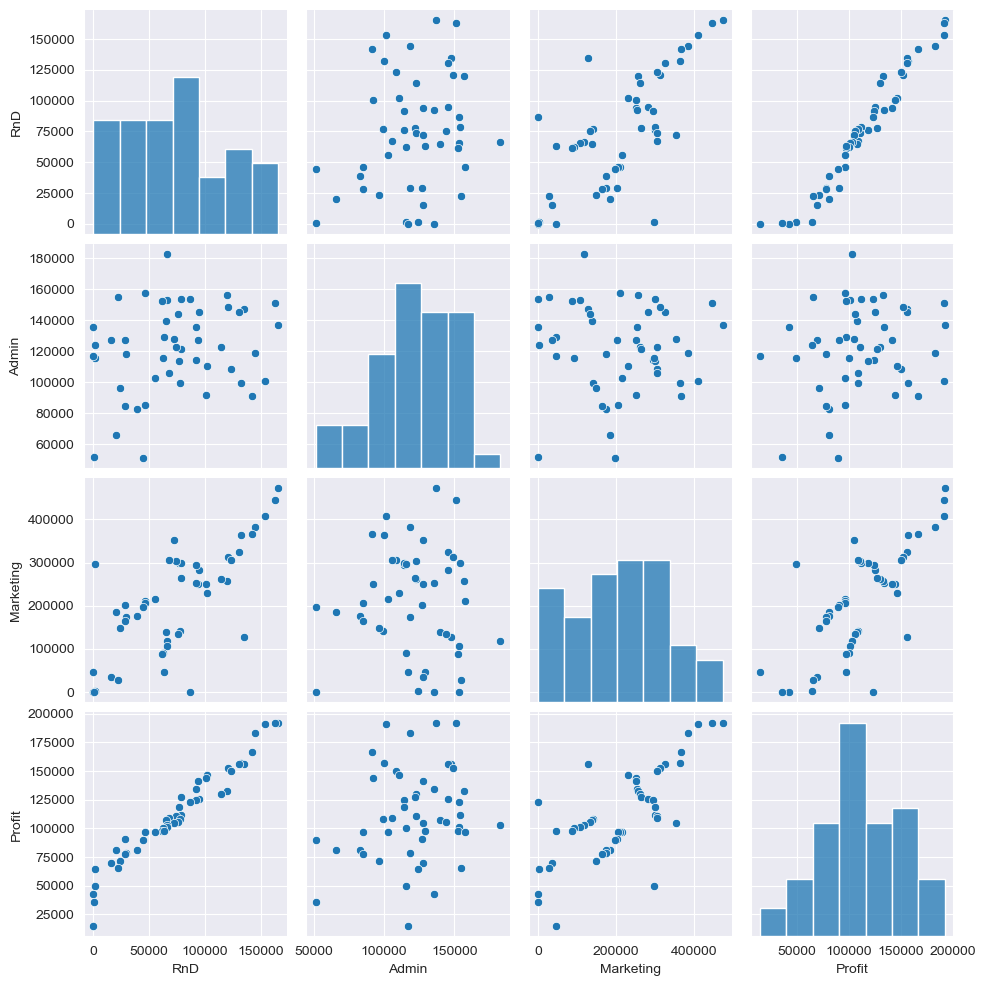

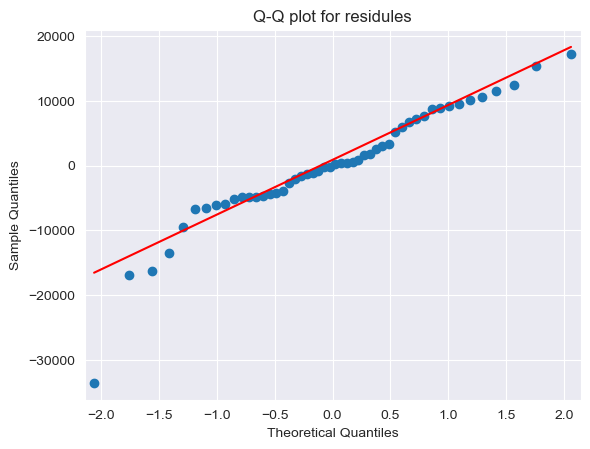

In [57]:
import statsmodels.api as sm 
qqplot = sm.qqplot(model.resid, line='q')#Line = 45 to draw the diagonal line 
plt.title("Q-Q plot for residules")
plt.show()

In [58]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [59]:
#Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residule values)
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

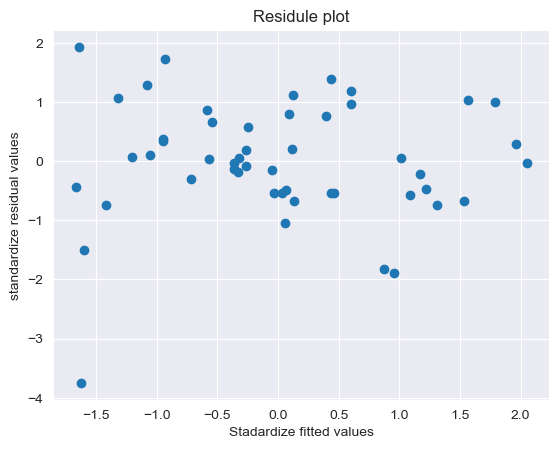

In [60]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residule plot')
plt.xlabel('Stadardize fitted values')
plt.ylabel('standardize residual values')
plt.show()

In [61]:
#Test for errors or Rsiduals Vs Regressors or Independent (x) variables or predictros 

eval_env: 1


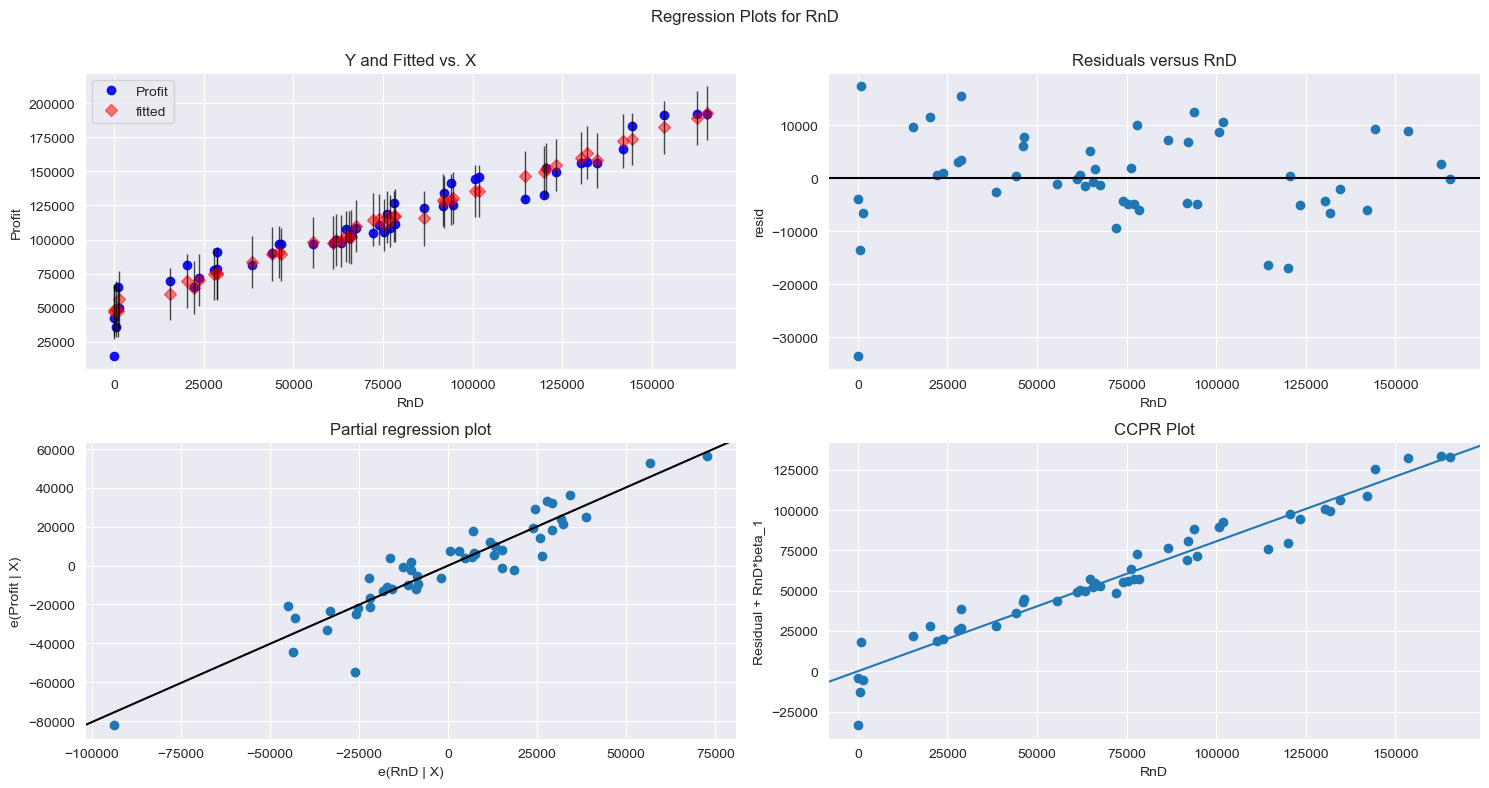

In [62]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "RnD", fig = fig)
plt.show()

eval_env: 1


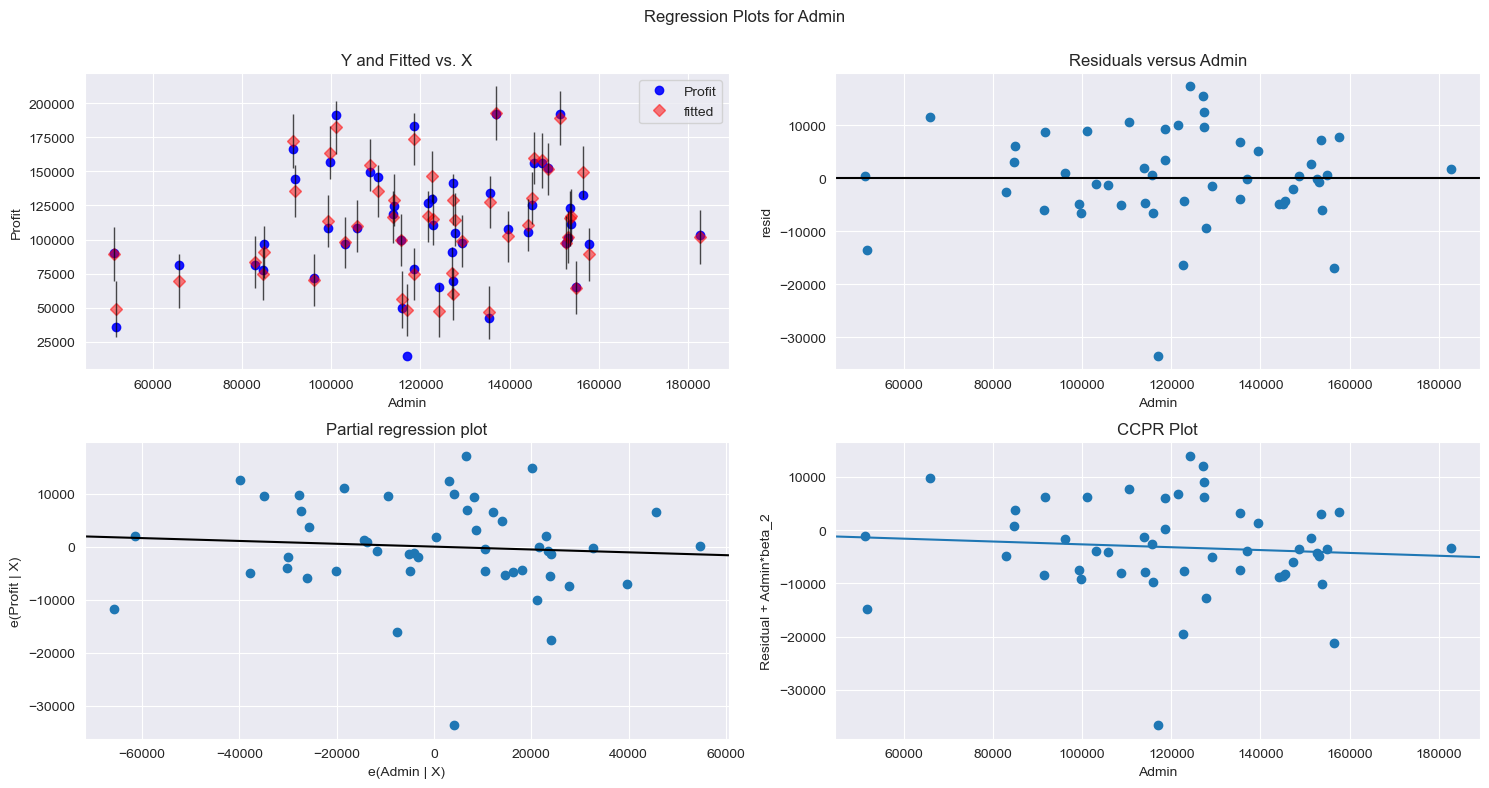

In [63]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Admin", fig=fig)
plt.show()

eval_env: 1


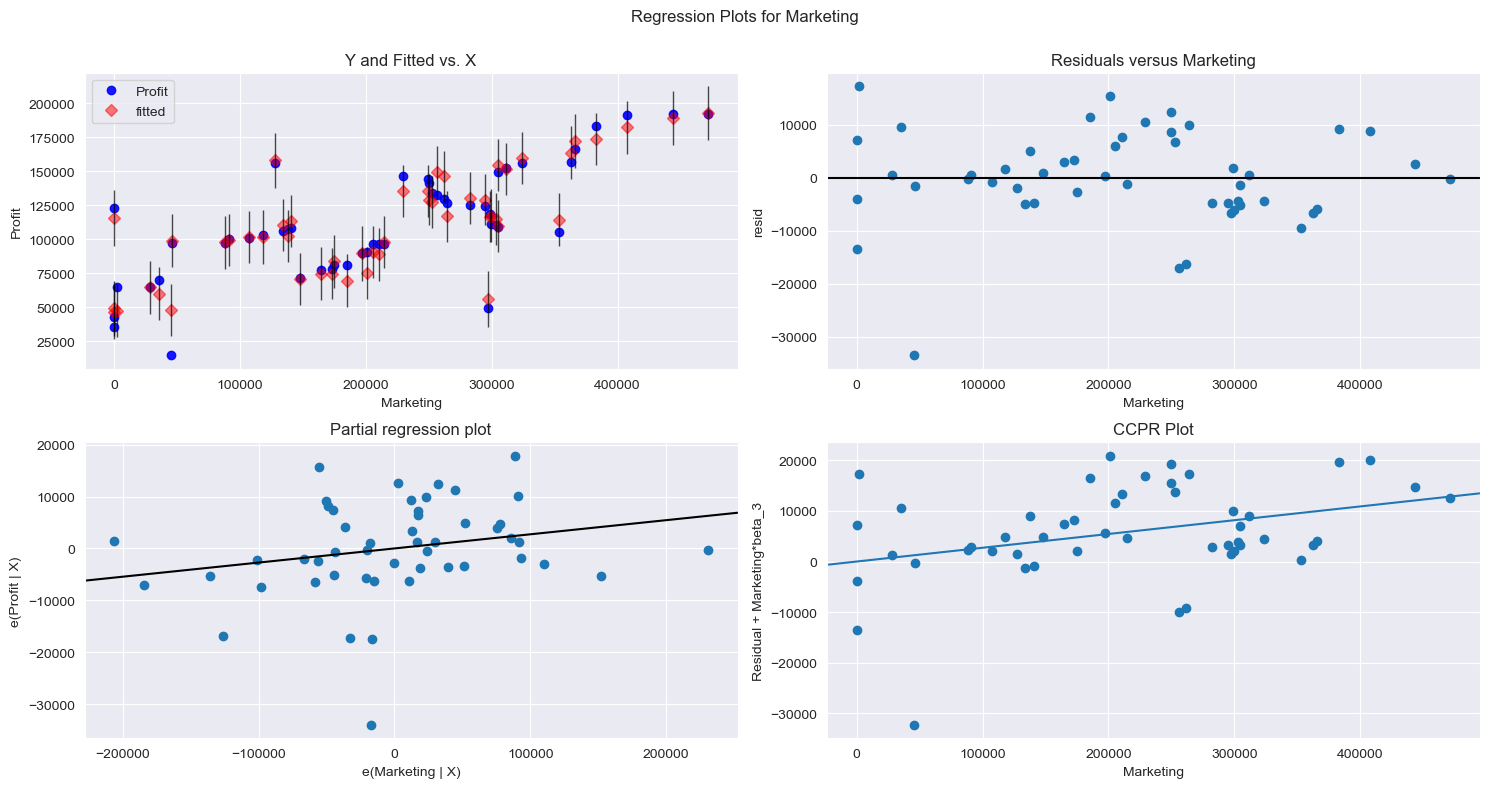

In [64]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,"Marketing",fig=fig)
plt.show()

In [65]:
#Model Deletion Diagnostics
# Cook's Distance 
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

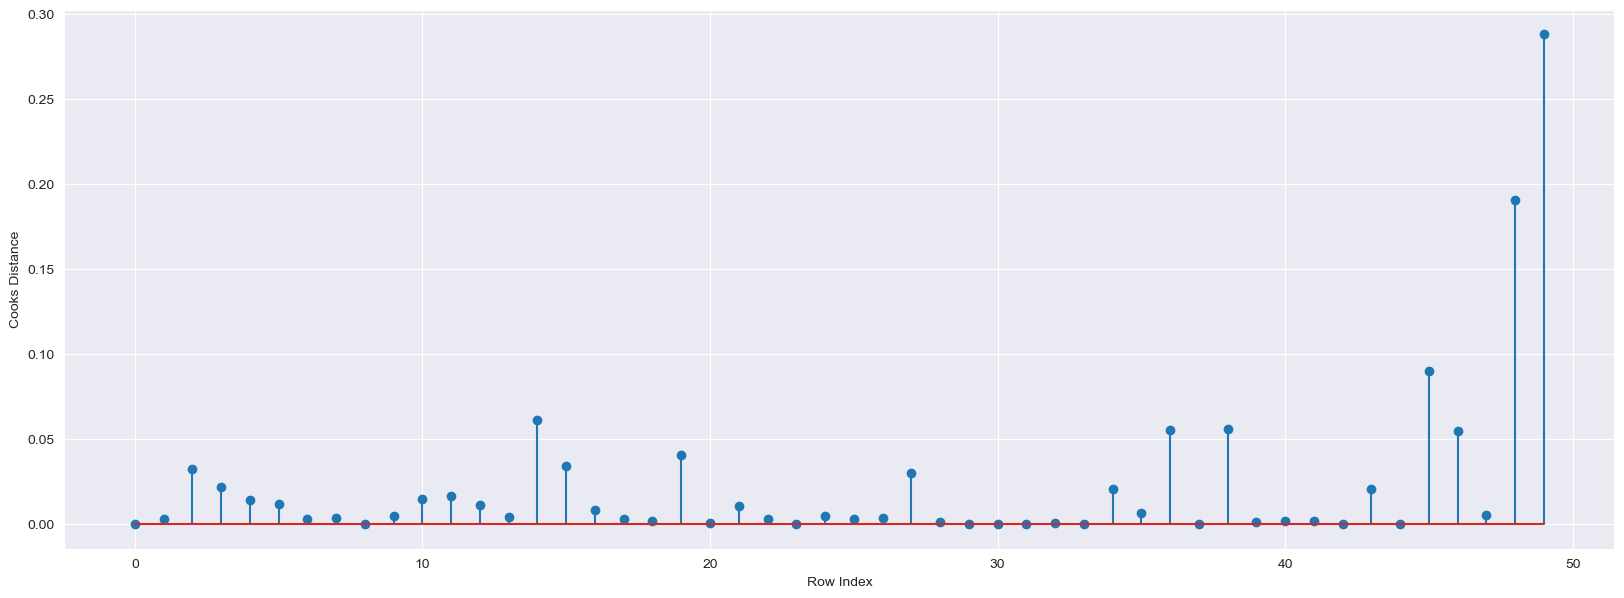

In [66]:
#plotting influenceer values using stem plot 
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startUp1)), np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [67]:
#Index and value of influence where C is more than 0.5
np.argmax(c), np.max(c)

(49, 0.2880822927543264)

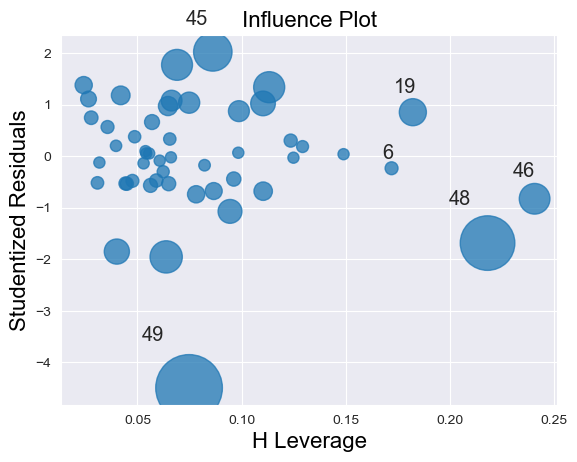

In [68]:
#Leverage value using High Influence Points: Points beyod Leverage_cutoff value are influencers 
from statsmodels.graphics. regressionplots import influence_plot
influence_plot(model)
plt.show()

In [70]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k = startUp1.shape[1]
n = startUp1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [71]:
startUp1[startUp1.index.isin([49])]

,RnD,Admin,Marketing,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [72]:
startUp1.head()

,RnD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [73]:
#Improving the model by discarding the influencer data points 49
startUp2 = startUp1.drop(startUp1.index[[49]], axis = 0).reset_index(drop=True)
startUp2
                                                    

,RnD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [74]:
model2 = smf.ols("Profit~RnD+Admin+Marketing", data=startUp2).fit()

In [75]:
model2.rsquared, model2.rsquared_adj, model.aic

(0.9613162435129847, 0.9587373264138503, 1058.7714985998055)

In [77]:
#Model Deletion for rowwise ouliers and model improvement 
model_influence_2 = model2.get_influence()
(c_2,_) = model_influence_2.cooks_distance

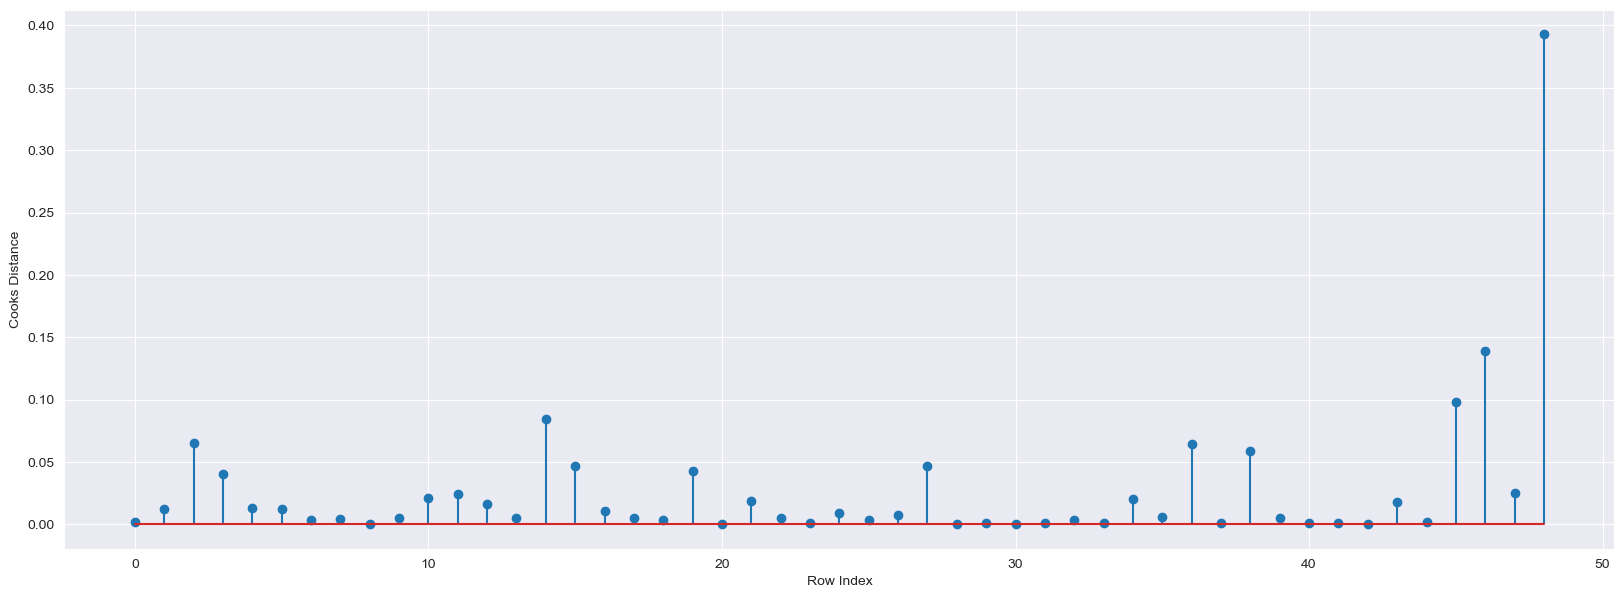

In [80]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startUp2)), np.round(c_2,3));
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance');
plt.show()

In [81]:
np.argmax(c_2), np.max(c_2)

(48, 0.39274420556321443)

In [82]:
startUp2[startUp2.index.isin([48])]

,RnD,Admin,Marketing,State,Profit
48,542.05,51743.15,0.0,New York,35673.41


In [83]:
startUp3 = startUp2.drop(startUp2.index[[48]], axis=0).reset_index(drop=True)
startUp3

,RnD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [84]:
model3 = smf.ols("Profit~RnD+Admin+Marketing", data=startUp3).fit()

In [85]:
model3.rsquared,model3.rsquared_adj,model3.aic

(0.9626766170294073, 0.960131840917776, 994.6690439260116)

In [86]:
#Model Deletion for rowwise ouliers and model improvement 
model_influence_3 = model3.get_influence()
(c_3,_) = model_influence_3.cooks_distance

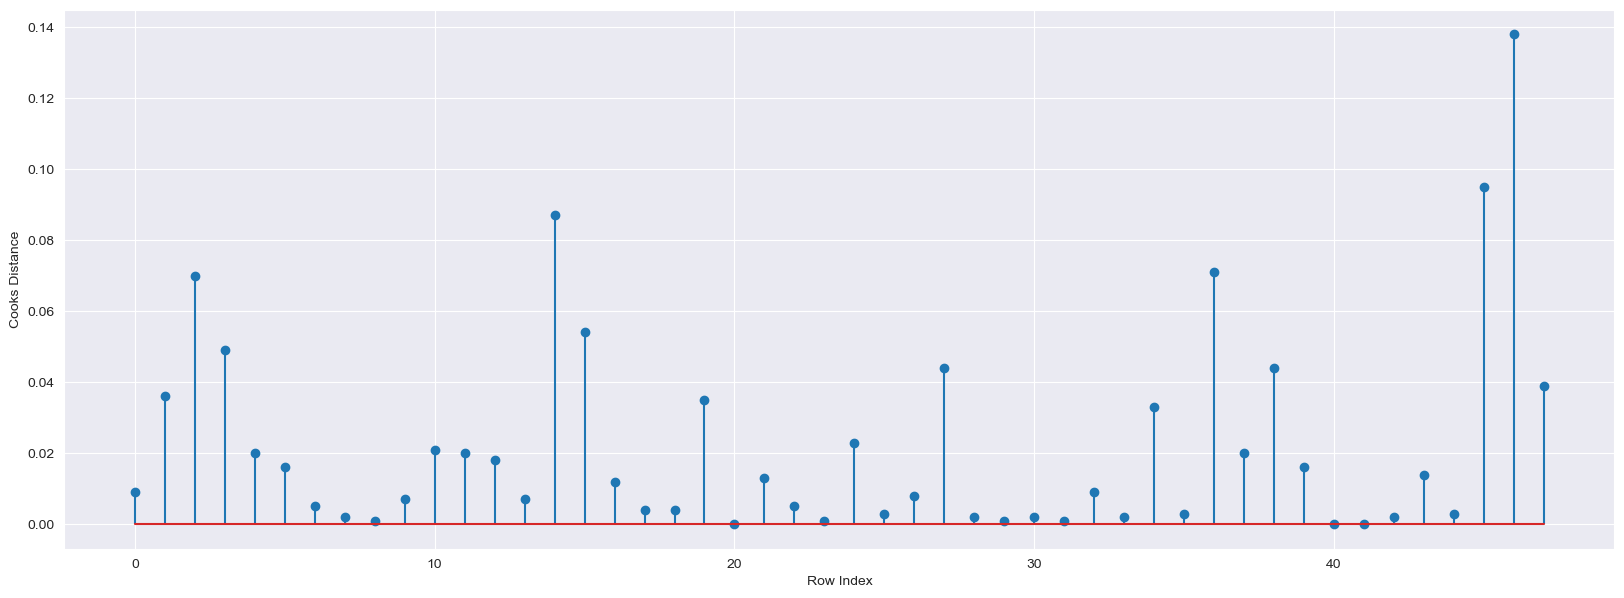

In [87]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startUp3)), np.round(c_3,3));
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [88]:
np.argmax(c_3), np.max(c_3)

(46, 0.13829133994334297)

In [89]:
startUp3[startUp3.index.isin([46])]

,RnD,Admin,Marketing,State,Profit
46,1315.46,115816.21,297114.46,Florida,49490.75


In [90]:
startUp4 = startUp3.drop(startUp3.index[[46]], axis = 0).reset_index(drop=True)
startUp4

,RnD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [91]:
model4 = smf.ols("Profit~RnD+Admin+Marketing", data=startUp4).fit()

In [92]:
model4.rsquared, model4.rsquared_adj, model4.aic

(0.9614129113440602, 0.9587207888796923, 973.2489443962857)

In [94]:
#Here as we see the r squared value has been dropped so we stop, hence our final model will "model3"
Final_model = smf.ols("Profit~RnD+Admin+Marketing", data=startUp3).fit()


In [102]:
Final_model.rsquared, Final_model.rsquared_adj, Final_model.aic

(0.9626766170294073, 0.960131840917776, 994.6690439260116)

In [103]:
#Prediction of Price 
pred_y = Final_model.predict(startUp3)
pred_y

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
dtype: float64